<a href="https://colab.research.google.com/github/perezlenin1984/Pruebas_Icfes_2023/blob/main/Version_01/Prueba_Saber_V1_1_Bosque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALENTOTECH Y MINTIC**

**BOOTCAMP: ANÁLISIS Y VISUALIZACIÓN DE DATOS**

**PROYECTO: PRUEBAS SABER 11-2023 BOGOTÁ**

**NOTEBOOK VERSIÓN 1.1: Bosque aleatorio eliminando todos los valores nulos**

**Profesor:** Ingeniero José Albeiro Montes Gil

**Equipo de trabajo:**

Lenin Hernando Pérez

Diana Carolina Valencia

Edwin Tumay Mojica

**Introducción**

En este notebook se presentan un análisis exploratorio de las pruebas Saber del grado 11 del año 2023 para saber cómo están distribuidos los datos y la aplicación del modelo de machine learning random forest para ver cómo clasifica los puntajes de los estudiantes de acuerdo con su situación socioeconómica.

Es necesario que recordar que para esta versión se van a eliminar todos los valores nulos para examinar cómo se comportan los modelos en ese contexto y compararlos con otras condiciones (eliminando columnas que no se requieren y luego eliminar los valores nulos, rellenando todos los valores nulos, eliminar columnas que no se requieren y luego rellenar los valores nulos).

**Importar las bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

**Cargar los datos**

In [2]:
df1 = pd.read_excel('/content/Icfes2023-A.xlsx')
df2 = pd.read_excel('/content/Icfes2023-B.xlsx')

In [3]:
#Obtener las columnas que tienen en común df1 y df2
col_comun = list(set(df1.columns)&set(df2.columns))
#Preparar los nuevos df de acuerdo con las columnas que tienen en común
df1_comun = df1[col_comun]
df2_comun = df2[col_comun]
#Concatenar df1_comun con df2_comun
merged_df = pd.concat([df1_comun, df2_comun], ignore_index=True)
#Información básica de las columnas de merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FAMI_TIENECOMPUTADOR           77675 non-null  object        
 1   PUNT_MATEMATICAS               80847 non-null  int64         
 2   COLE_JORNADA                   80847 non-null  object        
 3   ESTU_COD_DEPTO_PRESENTACION    80847 non-null  int64         
 4   COLE_GENERO                    80847 non-null  object        
 5   ESTU_DEDICACIONLECTURADIARIA   75896 non-null  object        
 6   COLE_CALENDARIO                80847 non-null  object        
 7   FAMI_NUMLIBROS                 75558 non-null  object        
 8   COLE_MCPIO_UBICACION           80847 non-null  object        
 9   FAMI_COMECARNEPESCADOHUEVO     75766 non-null  object        
 10  ESTU_MCPIO_PRESENTACION        80847 non-null  object        
 11  ESTU_PRIVADO_LI

**Preparación de los datos**

In [4]:
seleccionColumnas = ["ESTU_PRESENTACIONSABADO","FAMI_EDUCACIONMADRE",
                    "FAMI_TIENESERVICIOTV","COLE_CARACTER","ESTU_GENERO","FAMI_TIENEHORNOMICROOGAS",
                    "FAMI_PERSONASHOGAR","ESTU_TIPOREMUNERACION","FAMI_TIENECONSOLAVIDEOJUEGOS",
                    "ESTU_HORASSEMANATRABAJA","FAMI_EDUCACIONPADRE","FAMI_TIENEAUTOMOVIL",
                    "COLE_JORNADA","COLE_NATURALEZA","FAMI_TRABAJOLABORMADRE","ESTU_NSE_INDIVIDUAL",
                    "FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_TIENECOMPUTADOR",
                    "FAMI_CUARTOSHOGAR","FAMI_TIENEMOTOCICLETA","FAMI_COMELECHEDERIVADOS",
                    "FAMI_TIENEINTERNET","ESTU_DEDICACIONLECTURADIARIA","COLE_AREA_UBICACION",
                    "FAMI_SITUACIONECONOMICA","FAMI_ESTRATOVIVIENDA","FAMI_TRABAJOLABORPADRE","ESTU_FECHANACIMIENTO",
                     "COLE_GENERO","FAMI_COMECARNEPESCADOHUEVO","PUNT_GLOBAL", "FAMI_TIENELAVADORA","COLE_CALENDARIO",
                     "ESTU_DEDICACIONINTERNET","ESTU_NSE_ESTABLECIMIENTO","FAMI_NUMLIBROS",'COLE_BILINGUE']
df_icfes = merged_df[seleccionColumnas]
print(df_icfes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        80699 non-null  object        
 1   FAMI_EDUCACIONMADRE            76133 non-null  object        
 2   FAMI_TIENESERVICIOTV           75913 non-null  object        
 3   COLE_CARACTER                  77102 non-null  object        
 4   ESTU_GENERO                    80847 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       77632 non-null  object        
 6   FAMI_PERSONASHOGAR             77721 non-null  object        
 7   ESTU_TIPOREMUNERACION          77520 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   77584 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        77633 non-null  object        
 10  FAMI_EDUCACIONPADRE            76179 non-null  object        
 11  FAMI_TIENEAUTOM

In [5]:
data_icfes = df_icfes.dropna()
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        56666 non-null  object        
 1   FAMI_EDUCACIONMADRE            56666 non-null  object        
 2   FAMI_TIENESERVICIOTV           56666 non-null  object        
 3   COLE_CARACTER                  56666 non-null  object        
 4   ESTU_GENERO                    56666 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  object        
 6   FAMI_PERSONASHOGAR             56666 non-null  object        
 7   ESTU_TIPOREMUNERACION          56666 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  object        
 10  FAMI_EDUCACIONPADRE            56666 non-null  object        
 11  FAMI_TIENEAUTOMOVIL 

In [6]:
data_icfes = data_icfes.drop_duplicates()
data_icfes

,ESTU_PRESENTACIONSABADO,FAMI_EDUCACIONMADRE,FAMI_TIENESERVICIOTV,COLE_CARACTER,ESTU_GENERO,FAMI_TIENEHORNOMICROOGAS,FAMI_PERSONASHOGAR,ESTU_TIPOREMUNERACION,FAMI_TIENECONSOLAVIDEOJUEGOS,ESTU_HORASSEMANATRABAJA,...,ESTU_FECHANACIMIENTO,COLE_GENERO,FAMI_COMECARNEPESCADOHUEVO,PUNT_GLOBAL,FAMI_TIENELAVADORA,COLE_CALENDARIO,ESTU_DEDICACIONINTERNET,ESTU_NSE_ESTABLECIMIENTO,FAMI_NUMLIBROS,COLE_BILINGUE
4,No,Postgrado,Si,ACADÉMICO,M,Si,3 a 4,Si; en efectivo,Si,0,...,2006-01-21,MIXTO,Todos o casi todos los días,328,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
5,No,Secundaria (Bachillerato) completa,Si,ACADÉMICO,M,Si,3 a 4,No,No,0,...,2005-10-16,MIXTO,Todos o casi todos los días,304,Si,A,Entre 1 y 3 horas,3,11 A 25 LIBROS,N
8,No,Postgrado,Si,ACADÉMICO,F,No,3 a 4,No,No,0,...,2006-08-15,MIXTO,3 a 5 veces por semana,420,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
9,No,Postgrado,Si,ACADÉMICO,M,Si,5 a 6,No,Si,Entre 11 y 20 horas,...,2007-01-18,MIXTO,Todos o casi todos los días,281,Si,A,Más de 3 horas,3,0 A 10 LIBROS,N
10,No,Educación profesional completa,No,ACADÉMICO,M,No,3 a 4,No,No,Menos de 10 horas,...,2006-08-01,MIXTO,3 a 5 veces por semana,311,Si,A,Entre 30 y 60 minutos,3,0 A 10 LIBROS,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80833,No,Educación profesional incompleta,Si,ACADÉMICO,F,Si,1 a 2,Si; en efectivo,No,Menos de 10 horas,...,2005-04-08,FEMENINO,3 a 5 veces por semana,285,Si,B,Entre 30 y 60 minutos,4,11 A 25 LIBROS,N
80834,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,No,Entre 11 y 20 horas,...,2004-08-25,FEMENINO,Todos o casi todos los días,312,Si,B,Entre 30 y 60 minutos,4,26 A 100 LIBROS,N
80835,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,Si,0,...,2005-06-22,FEMENINO,Todos o casi todos los días,366,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N
80836,No,Postgrado,Si,ACADÉMICO,F,Si,3 a 4,No,No,0,...,2004-11-04,FEMENINO,Todos o casi todos los días,407,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N


**Transformación de los datos**

In [7]:
frecuencia = {'Nunca o rara vez comemos eso':0, '1 o 2 veces por semana': 1, '3 a 5 veces por semana': 2, 'Todos o casi todos los días': 3}
data_icfes['FAMI_COMELECHEDERIVADOS'] = data_icfes['FAMI_COMELECHEDERIVADOS'].map(frecuencia)

In [8]:
data_icfes['FAMI_COMECARNEPESCADOHUEVO'] = data_icfes['FAMI_COMECARNEPESCADOHUEVO'].map(frecuencia)

In [9]:
data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].map(frecuencia)

In [10]:
educacion = {'No sabe':0,'No Aplica':1,'Ninguno':2, 'Primaria incompleta':3, 'Primaria completa':4,'Secundaria (Bachillerato) incompleta':5,
                      'Secundaria (Bachillerato) completa':6,'Técnica o tecnológica incompleta':7,'Técnica o tecnológica completa':8,
                     'Educación profesional incompleta':9,'Educación profesional completa':10,'Postgrado':11}
data_icfes['FAMI_EDUCACIONMADRE'] = data_icfes['FAMI_EDUCACIONMADRE'].map(educacion)
data_icfes['FAMI_EDUCACIONPADRE'] = data_icfes['FAMI_EDUCACIONPADRE'].map(educacion)

In [11]:
labor = {'Trabaja como profesional (por ejemplo médico; abogado; ingeniero)': 0,
         'Es operario de máquinas o conduce vehículos (taxita; chofer)': 1,
         'Trabaja por cuenta propia (por ejemplo plomero; electricista)': 2,
         'No sabe': 3,
         'No aplica': 4,
         'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene; por ejemplo tienda; papelería; etc': 5,
         'Trabaja como personal de limpieza; mantenimiento; seguridad o construcción': 6,
         'Es vendedor o trabaja en atención al público': 7,
         'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo; secretario o asistente)': 8,
         'Es dueño de un negocio grande; tiene un cargo de nivel directivo o gerencial': 9,
         'Trabaja en el hogar; no trabaja o estudia': 10,
         'Pensionado': 11,
         'Es agricultor; pesquero o jornalero': 12}
data_icfes['FAMI_TRABAJOLABORPADRE'] = data_icfes['FAMI_TRABAJOLABORPADRE'].map(labor)
data_icfes['FAMI_TRABAJOLABORMADRE'] = data_icfes['FAMI_TRABAJOLABORMADRE'].map(labor)

In [12]:
si_no = {'Si': 1, 'No': 0}
data_icfes['ESTU_PRESENTACIONSABADO'] = data_icfes['ESTU_PRESENTACIONSABADO'].map(si_no)
data_icfes['FAMI_TIENESERVICIOTV'] = data_icfes['FAMI_TIENESERVICIOTV'].map(si_no)
data_icfes['FAMI_TIENEHORNOMICROOGAS'] = data_icfes['FAMI_TIENEHORNOMICROOGAS'].map(si_no)
data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'] = data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'].map(si_no)
data_icfes['FAMI_TIENEAUTOMOVIL'] = data_icfes['FAMI_TIENEAUTOMOVIL'].map(si_no)
data_icfes['FAMI_TIENECOMPUTADOR'] = data_icfes['FAMI_TIENECOMPUTADOR'].map(si_no)
data_icfes['FAMI_TIENEMOTOCICLETA'] = data_icfes['FAMI_TIENEMOTOCICLETA'].map(si_no)
data_icfes['FAMI_TIENEINTERNET'] = data_icfes['FAMI_TIENEINTERNET'].map(si_no)
data_icfes['FAMI_TIENELAVADORA'] = data_icfes['FAMI_TIENELAVADORA'].map(si_no)

In [13]:
ese_ene = {'S': 1, 'N': 0}
data_icfes['COLE_BILINGUE'] = data_icfes['COLE_BILINGUE'].map(ese_ene)

In [14]:
genero = {'M': 1, 'F': 0}
data_icfes['ESTU_GENERO'] = data_icfes['ESTU_GENERO'].map(genero)

In [15]:
naturaleza = {'OFICIAL':0, 'NO OFICIAL': 1}
data_icfes['COLE_NATURALEZA'] = data_icfes['COLE_NATURALEZA'].map(naturaleza)

In [16]:
area = {'URBANO': 0, 'RURAL': 1}
data_icfes['COLE_AREA_UBICACION'] = data_icfes['COLE_AREA_UBICACION'].map(area)

In [17]:
caracter = {'NO APLICA':0, 'TÉCNICO': 1, 'ACADÉMICO': 2, 'TÉCNICO/ACADÉMICO': 3}
data_icfes['COLE_CARACTER'] = data_icfes['COLE_CARACTER'].map(caracter)

In [18]:
personas_hogar = {'1 a 2':1, '3 a 4': 2, '5 a 6': 3, '7 a 8': 4, '9 o más': 5}
data_icfes['FAMI_PERSONASHOGAR'] = data_icfes['FAMI_PERSONASHOGAR'].map(personas_hogar)

In [19]:
remuneracion = {'No':0, 'Si; en especie': 1, 'Si; en efectivo': 2, 'Si; en efectivo y especie': 3}
data_icfes['ESTU_TIPOREMUNERACION'] = data_icfes['ESTU_TIPOREMUNERACION'].map(remuneracion)

In [20]:
horas_semana = {'0':0, 'Menos de 10 horas': 1, 'Entre 11 y 20 horas': 2, 'Entre 21 y 30 horas': 3, 'Más de 30 horas': 4}
data_icfes['ESTU_HORASSEMANATRABAJA'] = data_icfes['ESTU_HORASSEMANATRABAJA'].map(horas_semana)

In [21]:
jornada = {'SABATINA':0, 'NOCHE': 1, 'TARDE': 2, 'UNICA': 3, 'MAÑANA': 4, 'COMPLETA': 5}
data_icfes['COLE_JORNADA'] = data_icfes['COLE_JORNADA'].map(jornada)

In [22]:
cuartos = {'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5, 'Seis o mas': 6}
data_icfes['FAMI_CUARTOSHOGAR'] = data_icfes['FAMI_CUARTOSHOGAR'].map(cuartos)

In [23]:
lectura = {'30 minutos o menos': 0,
           'Entre 30 y 60 minutos': 1,
           'Entre 1 y 2 horas': 2,
           'Más de 2 horas': 3,
           'No leo por entretenimiento': 4}
data_icfes['ESTU_DEDICACIONLECTURADIARIA'] = data_icfes['ESTU_DEDICACIONLECTURADIARIA'].map(lectura)

In [24]:
economia = {'Peor': 0, 'Igual': 1, 'Mejor': 2}
data_icfes['FAMI_SITUACIONECONOMICA'] = data_icfes['FAMI_SITUACIONECONOMICA'].map(economia)

In [25]:
estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
data_icfes['FAMI_ESTRATOVIVIENDA'] = data_icfes['FAMI_ESTRATOVIVIENDA'].map(estrato)

In [26]:
genero_col = {'MIXTO': 0, 'FEMENINO': 1, 'MASCULINO': 2}
data_icfes['COLE_GENERO'] = data_icfes['COLE_GENERO'].map(genero_col)

In [27]:
calendario_col = {'OTRO': 0, 'A': 1, 'B': 2}
data_icfes['COLE_CALENDARIO'] = data_icfes['COLE_CALENDARIO'].map(calendario_col)

In [28]:
internet = {'No Navega Internet': 0, '30 minutos o menos': 1, 'Entre 30 y 60 minutos': 2, 'Entre 1 y 3 horas': 3, 'Más de 3 horas': 4}
data_icfes['ESTU_DEDICACIONINTERNET'] = data_icfes['ESTU_DEDICACIONINTERNET'].map(internet)

In [29]:
num_libros = {'0 A 10 LIBROS': 0, '11 A 25 LIBROS': 1, '26 A 100 LIBROS': 2, 'MÁS DE 100 LIBROS': 3}
data_icfes['FAMI_NUMLIBROS'] = data_icfes['FAMI_NUMLIBROS'].map(num_libros)

In [30]:
data_icfes['Fecha 2023'] = "2023-12-31"
data_icfes['Fecha 2023'] = pd.to_datetime(data_icfes['Fecha 2023'])
data_icfes['EDAD'] = (data_icfes['Fecha 2023'] - data_icfes['ESTU_FECHANACIMIENTO'])
data_icfes['EDAD'] = data_icfes['EDAD'].astype('timedelta64[s]')
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int64')
data_icfes['EDAD'] = data_icfes['EDAD']/31536000
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int')
data_icfes = data_icfes.drop('Fecha 2023', axis=1)
data_icfes = data_icfes.drop('ESTU_FECHANACIMIENTO', axis=1)

In [31]:
data_icfes['ESTU_NSE_INDIVIDUAL'] = data_icfes['ESTU_NSE_INDIVIDUAL'].astype('int')

In [32]:
data_icfes['PUNT_GLOBAL'] = pd.cut(data_icfes['PUNT_GLOBAL'], bins=[0, 100, 200, 300, 400, 500], labels=[0,1,2,3,4])
data_icfes['PUNT_GLOBAL'] = data_icfes['PUNT_GLOBAL'].astype('int')

In [33]:
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ESTU_PRESENTACIONSABADO        56666 non-null  int64
 1   FAMI_EDUCACIONMADRE            56666 non-null  int64
 2   FAMI_TIENESERVICIOTV           56666 non-null  int64
 3   COLE_CARACTER                  56666 non-null  int64
 4   ESTU_GENERO                    56666 non-null  int64
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  int64
 6   FAMI_PERSONASHOGAR             56666 non-null  int64
 7   ESTU_TIPOREMUNERACION          56666 non-null  int64
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  int64
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  int64
 10  FAMI_EDUCACIONPADRE            56666 non-null  int64
 11  FAMI_TIENEAUTOMOVIL            56666 non-null  int64
 12  COLE_JORNADA                   56666 non-null  int64
 13  COLE_NATURALEZA      

**Implementación del Bosque aleatorio**

1) Datos sin escalar

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [35]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [36]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [37]:
train_set, val_set, test_set = train_val_test_split(data_icfes)

In [38]:
X_train, y_train = remove_labels(train_set, 'PUNT_GLOBAL')
X_val, y_val = remove_labels(val_set, 'PUNT_GLOBAL')
X_test, y_test = remove_labels(test_set, 'PUNT_GLOBAL')

In [39]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_train_pred = clf_rf.predict(X_train)

In [41]:
print("F1 score bosque aleatorio train_set sin escalar:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score bosque aleatorio train_set sin escalar: 0.9999706352498755


In [42]:
y_val_pred = clf_rf.predict(X_val)

In [43]:
print("F1 score bosque aleatorio val_set sin escalar:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score bosque aleatorio val_set sin escalar: 0.7366064308830078


In [44]:
y_test_pred = clf_rf.predict(X_test)

In [45]:
print("F1 score bosque aleatorio test_set sin escalar:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score bosque aleatorio test_set sin escalar: 0.7321675440461043


2) Selección de características

In [46]:
clf_rf.feature_importances_

array([0.00899517, 0.06486541, 0.01162932, 0.01484279, 0.01835317,
       0.01528828, 0.03292208, 0.01691888, 0.0169243 , 0.02349571,
       0.06554681, 0.01766487, 0.05355101, 0.02870532, 0.05944124,
       0.02813184, 0.03691639, 0.00972871, 0.03996743, 0.01732976,
       0.03161595, 0.00491235, 0.04150398, 0.00297716, 0.02886394,
       0.0413655 , 0.06457106, 0.00988784, 0.02816151, 0.00703794,
       0.00414338, 0.03841802, 0.03371608, 0.03830703, 0.00261899,
       0.04068074])

In [47]:
feature_importances = {name: score for name, score in zip(list(data_icfes), clf_rf.feature_importances_)}

In [48]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

,0
FAMI_EDUCACIONPADRE,0.065547
FAMI_EDUCACIONMADRE,0.064865
FAMI_TRABAJOLABORPADRE,0.064571
FAMI_TRABAJOLABORMADRE,0.059441
COLE_JORNADA,0.053551
ESTU_DEDICACIONLECTURADIARIA,0.041504
FAMI_ESTRATOVIVIENDA,0.041365
COLE_BILINGUE,0.040681
FAMI_CUARTOSHOGAR,0.039967
COLE_CALENDARIO,0.038418


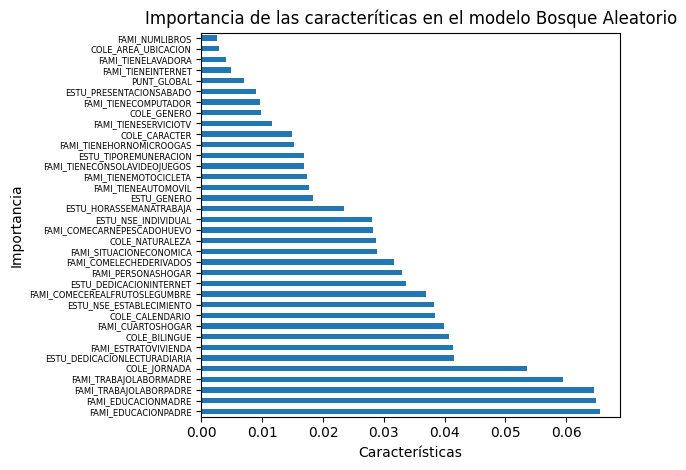

In [49]:
fig, ax = plt.subplots()
feature_importances_sorted.plot.barh()
ax.set_title("Importancia de las caracteríticas en el modelo Bosque Aleatorio")
ax.set_xlabel("Características")
ax.set_yticklabels(feature_importances_sorted.index.values, fontdict={'size': 6})
ax.set_ylabel("Importancia")
fig.tight_layout()

In [50]:
columnas = list(feature_importances_sorted.head(18).index)
columnas

['FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'COLE_JORNADA',
 'ESTU_DEDICACIONLECTURADIARIA',
 'FAMI_ESTRATOVIVIENDA',
 'COLE_BILINGUE',
 'FAMI_CUARTOSHOGAR',
 'COLE_CALENDARIO',
 'ESTU_NSE_ESTABLECIMIENTO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'ESTU_DEDICACIONINTERNET',
 'FAMI_PERSONASHOGAR',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_SITUACIONECONOMICA',
 'COLE_NATURALEZA',
 'FAMI_COMECARNEPESCADOHUEVO']

In [51]:
X_train_reduced = X_train[columnas].copy()
X_val_reduced = X_val[columnas].copy()
X_test_reduced = X_test[columnas].copy()

In [52]:
clf_rf.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_train_pred_1 = clf_rf.predict(X_train_reduced)

In [54]:
print("F1 score árbol de decisión train_set_reduced sin escalar:", f1_score(y_train_pred_1, y_train, average='weighted'))

F1 score árbol de decisión train_set_reduced sin escalar: 0.9989704112455222


In [55]:
y_val_pred_1 = clf_rf.predict(X_val_reduced)

In [56]:
print("F1 score bosque aleatorio val_set_reduced sin escalar:", f1_score(y_val_pred_1, y_val, average='weighted'))

F1 score bosque aleatorio val_set_reduced sin escalar: 0.7244987054570129


In [57]:
y_test_pred_1 = clf_rf.predict(X_test_reduced)

In [58]:
print("F1 score bosque aleatorio test_set_reduced sin escalar:", f1_score(y_test_pred_1, y_test, average='weighted'))

F1 score bosque aleatorio test_set_reduced sin escalar: 0.7191960316676317


Con respecto a la versión 1.0 (árbol de decisión), sigue existiendo overfitting en el random forest. Sin embargo, se aprecia que en este modelo se reduce la diferencia entre el f1-score del conjunto de datos de entrenamiento (alrededor del 99%) y los conjuntos de validación y pruebas (aproximadamente 72% ). Por lo tanto, el random forest sigue "aprendiéndose los datos de memoria", pero generaliza mejor que el árbol de decisión.

3) Random search

En este apartado se pretende buscar los mejores valores de los hiperparámetros para reducir el overfitting presentado en los puntos inmediatamente anteriores.

In [59]:
#Importar método para el Random Search
from sklearn.model_selection import RandomizedSearchCV
#Metodo que permite buscar valores aleatorios
from scipy.stats import randint

#Preparación del Random Search

param_distribs = {
    'n_estimators': randint(low=100, high=150),
    'max_depth': randint(low=10, high=20),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=4),
}

rand_clf_rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(estimator=rand_clf_rf, param_distributions=param_distribs,
                        n_iter=10, random_state=42, scoring='f1_weighted', cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b62e8ccb1d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b62e8c88550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b62e8ccac50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b62e8c7eb50>},
                   random_state=42, scoring='f1_weighted')

In [60]:
rand_search.best_params_

{'max_depth': 17,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 101}

In [61]:
rand_search.best_estimator_

RandomForestClassifier(max_depth=17, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=101)

In [62]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("F1 score:", mean_score, "-", "Parámetros:", params)

F1 score: 0.667783517338014 - Parámetros: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 142}
F1 score: 0.6674384240105633 - Parámetros: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 138}
F1 score: 0.6684513558843543 - Parámetros: {'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 110}
F1 score: 0.6660653931691968 - Parámetros: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 139}
F1 score: 0.6686220001632249 - Parámetros: {'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 101}
F1 score: 0.6664786499985322 - Parámetros: {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 101}
F1 score: 0.6669596301063512 - Parámetros: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 121}
F1 score: 0.6659028098774483 - Parámetros: {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_s

In [63]:
rand_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 101,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
clf_rf = rand_search.best_estimator_

In [65]:
y_train_pred = clf_rf.predict(X_train)

In [66]:
print("F1 score Conjunto entrenamiento:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score Conjunto entrenamiento: 0.833630669267376


In [67]:
y_val_pred = clf_rf.predict(X_val)

In [68]:
print("F1 score Conjunto validacion:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score Conjunto validacion: 0.7400017561809734


In [69]:
y_test_pred = clf_rf.predict(X_test)

In [70]:
print("F1 score Conjunto validacion:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score Conjunto validacion: 0.7396629789770701


Tras la optimización, se redujo el overfitting: el puntaje de F1-score en el conjunto de entrenamiento se redujo a 84,5%, mientras que los valores de F1-score los conjuntos de validación y prueba están en 74%.

A pesar de que el random forest generaliza mejor tras la optimización, no supera el desempeño del árbol de decisión: Mientras que en el random forest la diferencia entre los f1-score de los conjuntos de entrenamiento y validación es aproximadamente del 10%, en el árbol de decisión la diferencia es de alrededor del 2%.

Finalmente, se volverá a implementar el modelo con los valores de los hiperparámetros seleccionados y agregando como random_state igual a 42, ya que tras la optimización, el valor de random_state queda como None.

In [71]:
clf_rf_final = RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=7, n_estimators=101, random_state=42)
clf_rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=101, random_state=42)

In [72]:
y_train_pred = clf_rf_final.predict(X_train)

In [73]:
print("F1 score Conjunto entrenamiento:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score Conjunto entrenamiento: 0.8454446789987099


In [74]:
y_val_pred = clf_rf_final.predict(X_val)

In [75]:
print("F1 score Conjunto validación:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score Conjunto validación: 0.7409454833234013


In [76]:
y_test_pred = clf_rf_final.predict(X_test)

In [77]:
print("F1 score Conjunto pruebas:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score Conjunto pruebas: 0.7377404573757657
